In [10]:
#Importamos librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
#import statsmodels.api as sm
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OrdinalEncoder
import joblib

In [3]:
#Guardamos dataframes desde los datos ya limpios
df = pd.read_csv('data/clean_train.csv')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,4.0,65.0,8450,1.0,1.0,3.0,3.0,0.0,4.0,...,0,3.0,4.0,1.0,0,2,2008,9.0,4.0,208500
1,20,4.0,80.0,9600,1.0,1.0,3.0,3.0,0.0,2.0,...,0,3.0,4.0,1.0,0,5,2007,9.0,4.0,181500
2,60,4.0,68.0,11250,1.0,1.0,0.0,3.0,0.0,4.0,...,0,3.0,4.0,1.0,0,9,2008,9.0,4.0,223500
3,70,4.0,60.0,9550,1.0,1.0,0.0,3.0,0.0,0.0,...,0,3.0,4.0,1.0,0,2,2006,9.0,0.0,140000
4,60,4.0,84.0,14260,1.0,1.0,0.0,3.0,0.0,2.0,...,0,3.0,4.0,1.0,0,12,2008,9.0,4.0,250000


In [4]:
#Separamos variables para entrenamiento y prueba
X = df.drop(['SalePrice'],axis=1)
Y = df['SalePrice']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

In [5]:
Test_Y

1436    120500
57      196500
780     176000
382     213500
1170    171000
         ...  
1328    256000
1033    230000
977     199900
661     402000
914     173733
Name: SalePrice, Length: 292, dtype: int64

In [7]:
#Estandarizamos las variables.

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

#Mostramos ejemplo para train
Train_X_std.describe()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1168.000000,1.168000e+03,...,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03,1168.000000,1.168000e+03,1.168000e+03,1.168000e+03,1.168000e+03
mean,-8.516779e-17,-1.946692e-16,-7.300097e-17,4.866731e-17,2.600659e-16,-8.212609e-17,-6.995926e-17,7.528225e-17,0.000000,-3.878176e-17,...,2.433366e-17,-1.216683e-17,-1.551271e-15,-6.995926e-17,-2.555034e-16,0.000000,-5.018816e-17,-7.486705e-14,-4.653812e-16,-1.125432e-16
std,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428,1.000428e+00,...,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00,1.000428,1.000428e+00,1.000428e+00,1.000428e+00,1.000428e+00
min,-8.785477e-01,-5.034994e+00,-1.697926e+00,-9.327983e-01,-1.705872e+01,-3.943288e+00,-1.386826e+00,-3.842414e+00,-0.029273,-1.808904e+00,...,-2.646438e-01,-5.823501e-02,-2.135588e+01,-3.361093e+00,-2.930378e+00,-0.083201,-1.950125e+00,-1.356055e+00,-4.837349e+00,-3.407881e+00
25%,-8.785477e-01,7.555189e-03,-4.380216e-01,-3.024926e-01,5.862104e-02,6.520668e-02,-1.386826e+00,3.220829e-01,-0.029273,-1.201952e+00,...,-2.646438e-01,-5.823501e-02,5.499369e-02,4.493963e-01,-1.834426e-01,-0.083201,-8.547038e-01,-6.050489e-01,3.011122e-01,2.180858e-01
50%,-1.734558e-01,7.555189e-03,1.186805e-01,-9.459345e-02,5.862104e-02,6.520668e-02,7.473145e-01,3.220829e-01,-0.029273,6.189039e-01,...,-2.646438e-01,-5.823501e-02,5.499369e-02,4.493963e-01,-1.834426e-01,-0.083201,-1.244229e-01,1.459576e-01,3.011122e-01,2.180858e-01
75%,2.966054e-01,7.555189e-03,6.167824e-01,1.131024e-01,5.862104e-02,6.520668e-02,7.473145e-01,3.220829e-01,-0.029273,6.189039e-01,...,-2.646438e-01,-5.823501e-02,5.499369e-02,4.493963e-01,-1.834426e-01,-0.083201,6.058580e-01,8.969640e-01,3.011122e-01,2.180858e-01
max,3.116973e+00,1.268192e+00,7.473008e+00,2.081732e+01,5.862104e-02,4.073701e+00,7.473145e-01,3.220829e-01,34.161382,6.189039e-01,...,7.294196e+00,2.002194e+01,5.499369e-02,4.493963e-01,5.310428e+00,28.480437,2.066420e+00,1.647971e+00,3.011122e-01,1.124577e+00


In [8]:
#Modelo
#Ejecutamos Regresion Lineal (sin hacer feature selection ni eliminando multicolinealidad)

# Creamos modelo
model = LinearRegression()
model.fit(Train_X_std, Train_Y)

# Guardamos coeficientes
coefficients = model.coef_

coefficients_df1 = pd.DataFrame({
    'Feature': Train_X_std.columns,
    'Coefficient': coefficients
})

# Hacemos predicciones
y_train_pred = model.predict(Train_X_std)
y_test_pred = model.predict(Test_X_std)

# Evaluamos
mse_train = mean_squared_error(Train_Y, y_train_pred)
r2_train = r2_score(Train_Y, y_train_pred)
mse_test = mean_squared_error(Test_Y, y_test_pred)
r2_test = r2_score(Test_Y, y_test_pred)

# Guardamos resultados
results_df = pd.DataFrame({
    'Model': ["RegrLineal"],
    'MSE Train': [mse_train],
    'R-squared Train': [r2_train],
    'MSE Test': [mse_test],
    'R-squared Test': [r2_test]
})

results_df

,Model,MSE Train,R-squared Train,MSE Test,R-squared Test
0,RegrLineal,8.708904e+08,0.86123,2.795527e+09,0.565175


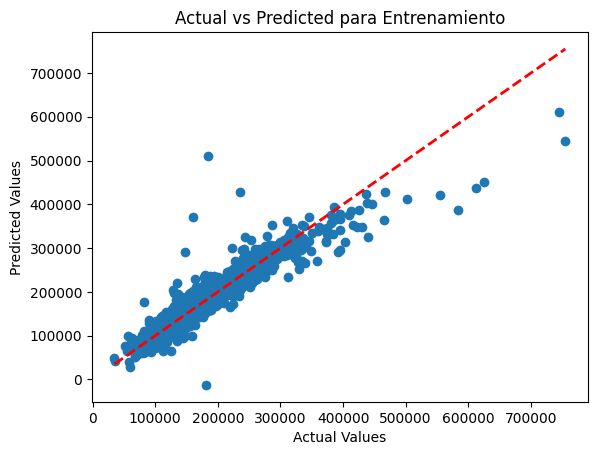

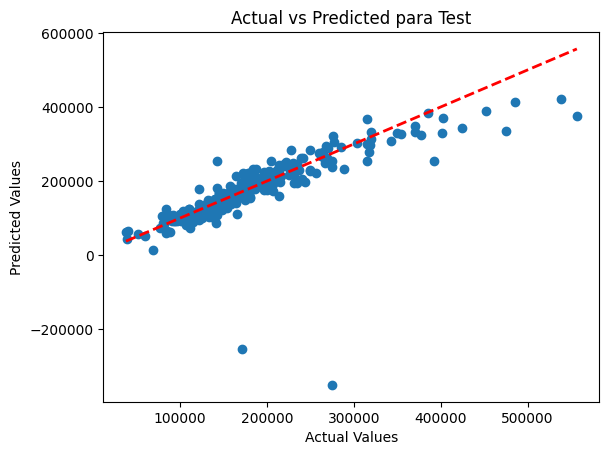

In [11]:
#Graficamos resultados de predicción

# Entrenamiento
plt.scatter(Train_Y, y_train_pred)
plt.plot([min(Train_Y), max(Train_Y)], [min(Train_Y), max(Train_Y)], linestyle='--', color='red', linewidth=2)  # 1:1 line
plt.title('Actual vs Predicted para Entrenamiento')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

# Test
plt.scatter(Test_Y, y_test_pred)
plt.plot([min(Test_Y), max(Test_Y)], [min(Test_Y), max(Test_Y)], linestyle='--', color='red', linewidth=2)  # 1:1 line
plt.title('Actual vs Predicted para Test')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

In [ ]:
# Guardamos modelo
filename = 'model.joblib'
joblib.dump(model, filename)